## Data Preprocessing

In [133]:
import os
import numpy as np
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2


def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img


def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    try:
        X = np.load('npy_dataset/X.npy')
        Y = np.load('npy_dataset/Y.npy')
    except:
        labels = listdir(dataset_path)  # Geting labels
        X = []
        Y = []
        for i, label in enumerate(labels):
            datas_path = dataset_path + '/' + label
            for data in listdir(datas_path):
                img = get_img(datas_path + '/' + data)
                X.append(img)
                Y.append(i)
        # Create dateset:
        X = 1 - np.array(X).astype('float32') / 255.0
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X, X_test, Y, Y_test


X, X_test, Y, Y_test = get_dataset()


## Imports

In [134]:

import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')

# from sklearn.model_selection import train_test_split

# import tensorflow as tf

# from sklearn.metrics import confusion_matrix, classification_report
y = np.argmax(Y, axis=1)
y.shape

(1649,)

In [135]:
def visualize_image_gray(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image, cmap=plt.cm.binary)

In [136]:
def visualize_image_rgb(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

## Images Visualization

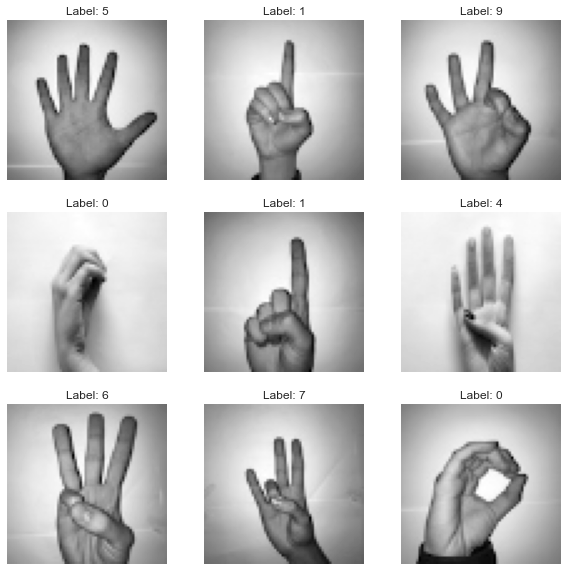

In [137]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_gray(X[i * 100], label="Label: " + str(y[i * 100]))

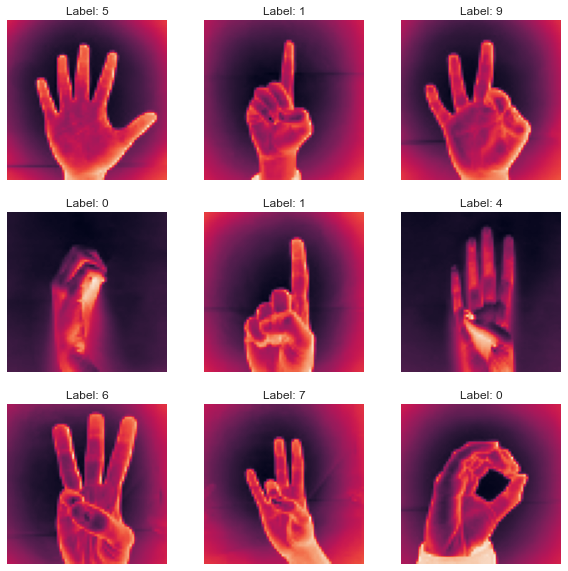

In [138]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_rgb(X[i * 100], label="Label: " + str(y[i * 100]))